In [1]:
# import required packages for data manupulation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import os
import random
plt.show()

In [2]:
# INPUT: set path for data placement 
#os.chdir(r'C:\Users\mshafin\Desktop\xavient_churn_project')
#os.chdir(r'C:\Users\mohammad shafin\Desktop\xavient_churn_project')

os.chdir(r'/home/mohnkhan/xavient_binary_unbalanced')
random.seed(42)
os.getcwd()

'/home/mohnkhan/xavient_binary_unbalanced'

In [3]:
# INPUT: data loaded to a pandas dataframe

df = pd.read_csv('telecom_churn_training.csv')
df.info()
df_length = df.shape[1]
df_row = df.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
customerID          5634 non-null object
gender              5634 non-null object
SeniorCitizen       5634 non-null int64
Partner             5634 non-null object
Dependents          5634 non-null object
tenure              5634 non-null int64
PhoneService        5634 non-null object
MultipleLines       5634 non-null object
InternetService     5634 non-null object
OnlineSecurity      5634 non-null object
OnlineBackup        5634 non-null object
DeviceProtection    5634 non-null object
TechSupport         5634 non-null object
StreamingTV         5634 non-null object
StreamingMovies     5634 non-null object
Contract            5634 non-null object
PaperlessBilling    5634 non-null object
PaymentMethod       5634 non-null object
MonthlyCharges      5634 non-null float64
TotalCharges        5626 non-null float64
Churn               5634 non-null object
dtypes: float64(2), int64(2), ob

In [4]:
df_row

5634

Columnwise missing value count


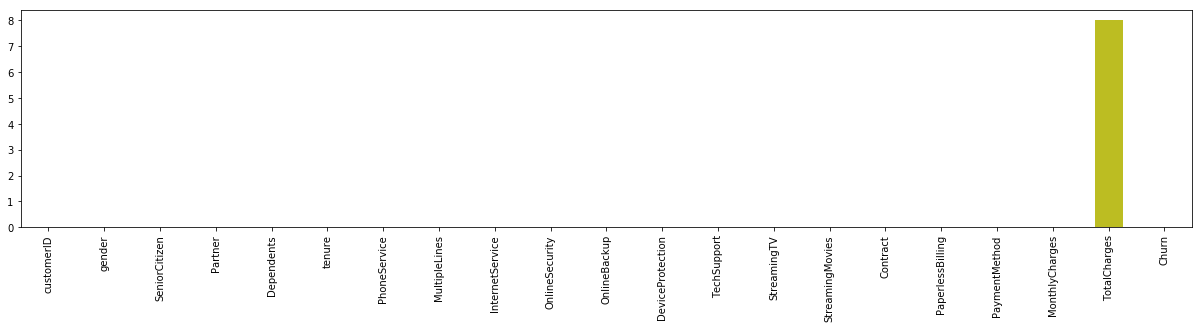

In [5]:
# count number of missing values in each column
# sum True's

print("Columnwise missing value count")
df.isnull().sum().plot.bar(figsize=(df_length, 4))
#df["target"].value_counts().plot.pie(figsize=(4, 4))
#print(df.target.value_counts())

In [6]:
# INPUT: set customer identification code and target variable

customer_identity_code = 'customerID'
target_code = 'Churn'

In [7]:
# set index for customer identification code

df = df.set_index(customer_identity_code)

In [8]:
# identify target variable

df['target'] = df[target_code]

In [9]:
# INPUT: set target labels

label_target1 = 'Yes'
label_target0 = 'No'

In [10]:
# function to recode target levels

def dependent_col(row):
    if row['target'] == label_target1:
        val = 1  # input
    elif row['target'] == label_target0:
        val = 0  # imput
    else:
        val = 2
    return val

In [11]:
# view recoded data in the target variable

df['target'] = df.apply(dependent_col, axis=1)
print(df.loc[:,['target','Churn']].head(5)) #check changes in target recoding

            target Churn
customerID              
7590-VHVEG       0    No
5575-GNVDE       0    No
3668-QPYBK       1   Yes
9305-CDSKC       1   Yes
6713-OKOMC       0    No


In [12]:
# keep rows when target variable is finite

start = df.shape[1]
df = df[np.isfinite(df['target'])]
finish = df.shape[1]
print("The number of row/rows dropped because of missing target variable is " + str(start-finish))

The number of row/rows dropped because of missing target variable is 0


In [13]:
# INPUT droping initial target
# when the target variable is identified and recoded it has to be removed by the program

df = df.drop(['Churn'],axis=1)

0    4139
1    1495
Name: target, dtype: int64


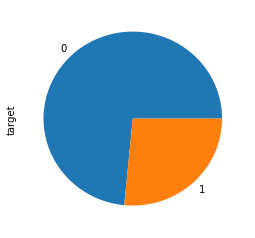

In [14]:
# target variable distibution

df["target"].value_counts().plot.pie(figsize=(4, 4))
print(df.target.value_counts())

In [15]:
# INPUT: populate with columns, which is considered discrete or non continious
# all categoies which have string input are categroized as object type in python by default

object_columns = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
                  'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                  'Contract','PaperlessBilling','PaymentMethod'] 

In [16]:
# typecasting 'object' type on variables that may be populated with numbers, but are of non-continious nature such as gender

for column in object_columns:
    df[column] = df[column].astype('object')

Value count of each level for datatype 'object'
gender


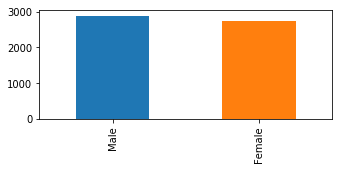

SeniorCitizen


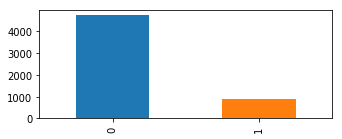

Partner


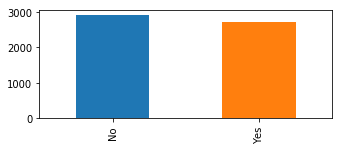

Dependents


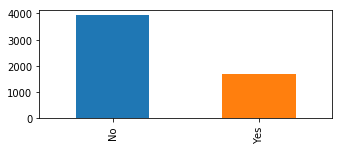

PhoneService


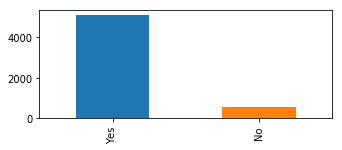

MultipleLines


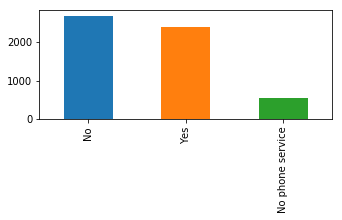

InternetService


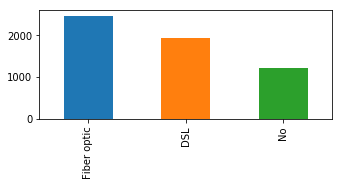

OnlineSecurity


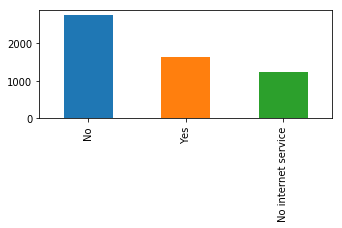

OnlineBackup


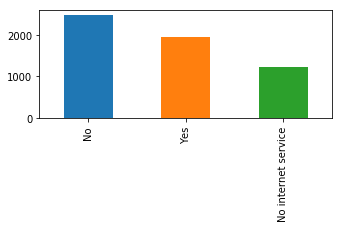

DeviceProtection


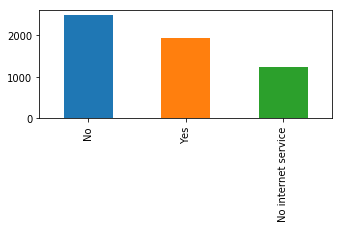

TechSupport


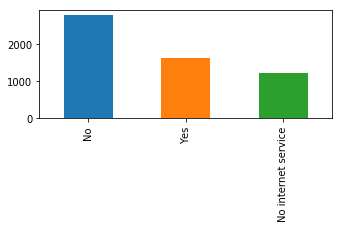

StreamingTV


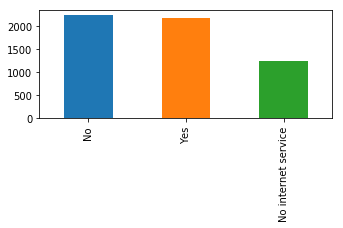

StreamingMovies


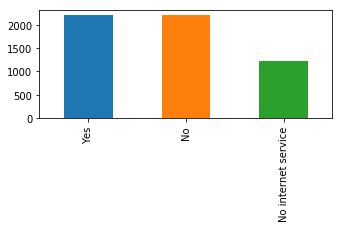

Contract


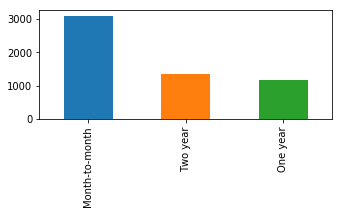

PaperlessBilling


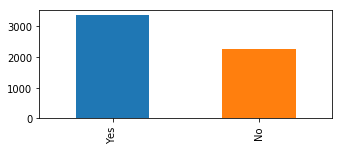

PaymentMethod


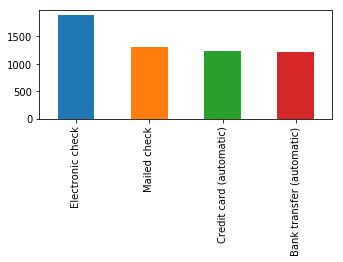

In [17]:
# view levels per columns in the non-continious variable

print("Value count of each level for datatype 'object'")

for column in object_columns:
    print(column)
    df[column].value_counts().plot.bar(figsize=(df_length/4, 2))
    plt.show()

In [18]:
# object variables converted to categories for cat.codes

object_columns = df.select_dtypes(['object']).columns

In [19]:
# missing value imputation strategy: create a new level called 'UNKNOWN'

print("The count of columns were successfully imputed with missing value indicator 'UKNOWN'")

for column in object_columns:
    if df[column].dtypes=="object":
        df[column] = df[column].fillna("UKNOWN").astype('object')    

The count of columns were successfully imputed with missing value indicator 'UKNOWN'


In [20]:
# missing value imputation strategy: create a new level called 'UNKNOWN'

for column in object_columns:
    if df[column].dtypes=="object":
        df[column] = df[column].astype('category')

In [21]:
# recoding categories to number with numerical and alphabatical order 0-1 and a-z, respectively

df[object_columns] = df[object_columns].apply(lambda x: x.cat.codes)

In [22]:
# chisquare test function

import scipy.stats as scs

def categories(series):
    return range(int(series.min()), int(series.max()) + 1)

def chi_square_of_df_cols(df, col1, col2):
    df_col1, df_col2 = df[col1], df[col2]

    result = [[sum((df_col1 == cat1) & (df_col2 == cat2))
               for cat2 in categories(df_col2)]
              for cat1 in categories(df_col1)]

    return scs.chi2_contingency(result)[1]

In [23]:
# function to check chisquare test for category variables

object_columns_final = []
chi_square_pvalue_final = []
for column in object_columns:
    chisquare_pvalue = round(chi_square_of_df_cols(df, column, 'target').astype('float64'),3)
    #if chi_square_of_df_cols(df, column, 'target') <= 0.05:
    object_columns_final.append(column)
    chi_square_pvalue_final.append(chisquare_pvalue)

In [24]:
# data frame create to view column wise p-value with respect to the target

df_catname = pd.DataFrame({'feature_name':object_columns_final})
df_pvalue = pd.DataFrame({'p-value':chi_square_pvalue_final})

frames = [df_catname,df_pvalue]
print(pd.concat(frames,axis=1))

        feature_name  p-value
0             gender    0.467
1      SeniorCitizen    0.000
2            Partner    0.000
3         Dependents    0.000
4       PhoneService    0.524
5      MultipleLines    0.005
6    InternetService    0.000
7     OnlineSecurity    0.000
8       OnlineBackup    0.000
9   DeviceProtection    0.000
10       TechSupport    0.000
11       StreamingTV    0.000
12   StreamingMovies    0.000
13          Contract    0.000
14  PaperlessBilling    0.000
15     PaymentMethod    0.000


In [25]:
# final list of categorical variables that survive the p-value check in the chi square test

object_columns_final = []

for column in object_columns:
    chisquare_pvalue = round(chi_square_of_df_cols(df, column, 'target').astype('float64'),3)
    if chi_square_of_df_cols(df, column, 'target') <= 0.05:
        object_columns_final.append(column)
print("Categorical variables selected for modeling post chi-square test")
print(object_columns_final)

Categorical variables selected for modeling post chi-square test
['SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [26]:
# function to check near zero variance

object_columns_final_nz = []
object_columns_final_variance = []

for column in object_columns_final:
    object_columns_variance = df[column].var(axis=None, skipna=None, level=None, ddof=1, numeric_only=None)
    #if  feature_columns_variance > 0.00:
    object_columns_final_nz.append(column)
    object_columns_final_variance.append(object_columns_variance)

In [27]:
df_object_columns_final_nz = pd.DataFrame({'feature_name':object_columns_final_nz})
df_variance = pd.DataFrame({'variance':object_columns_final_variance})
frames = [df_object_columns_final_nz,df_variance]

print(pd.concat(frames,axis=1))

        feature_name  variance
0      SeniorCitizen  0.134974
1            Partner  0.249754
2         Dependents  0.210589
3      MultipleLines  0.898554
4    InternetService  0.545985
5     OnlineSecurity  0.742403
6       OnlineBackup  0.773114
7   DeviceProtection  0.772293
8        TechSupport  0.740545
9        StreamingTV  0.781889
10   StreamingMovies  0.781998
11          Contract  0.696953
12  PaperlessBilling  0.240651
13     PaymentMethod  1.137929


In [28]:
# function to check near zero variance

object_columns_final_nz = []
object_columns_final_variance = []

for column in object_columns_final:
    object_columns_variance = df[column].var(axis=None, skipna=None, level=None, ddof=1, numeric_only=None)
    if  object_columns_variance > 0.01:
        object_columns_final_nz.append(column)
        object_columns_final_variance.append(object_columns_variance)
print("Categorical variables with variance above 0.01")
print(object_columns_final_nz)
print("number of categorical columns: "+ str(len(object_columns_final_nz)))

Categorical variables with variance above 0.01
['SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
number of categorical columns: 14


In [29]:
# saving categorical columns for scoring

import pickle
object_columns_final_nz_index = object_columns_final_nz

pickle_out_cat = open("object_columns_final_nz.pickle","wb")
pickle.dump(object_columns_final_nz_index, pickle_out_cat)
pickle_out_cat.close()

In [30]:
# load numeric columns for scoring
import pickle
pickle_in_cat = open("object_columns_final_nz.pickle","rb")
object_columns_final_nz_index = pickle.load(pickle_in_cat)
len(object_columns_final_nz_index)
#df[object_columns_final_nz_index]

14

In [31]:
# INPUT: populate with numeric columns
# missing value treatments

numeric_columns_mean = ['MonthlyCharges','TotalCharges'] # impute missing numeric columns with mean

# impute missing numeric columns with zero

numeric_columns_zero = ['tenure'] # populate with numeric columns

scale_columns = numeric_columns_mean + numeric_columns_zero
length = len(scale_columns) # for figure width

Check for continous variable scaling


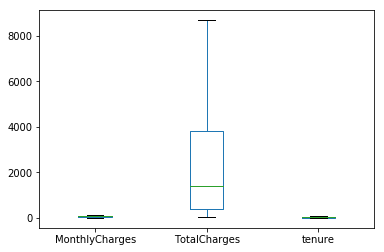

In [32]:
df[scale_columns].plot.box(figsize=(length*2,4))
print("Check for continous variable scaling")

In [33]:
# for mean imputation

for column in numeric_columns_mean:
    if df[column].dtypes in ["int64","float64"] :
        df[column] = df[column].fillna(df[column].mean())

# for 0 imputation

for column in numeric_columns_zero:
    if df[column].dtypes in ["int64","float64"] :
        df[column] = df[column].fillna(0)

# append all numerical columns

scale_columns = numeric_columns_mean + numeric_columns_zero

In [34]:
# scale the numerical variables to remove outliers
from sklearn.preprocessing import scale
for column in scale_columns:
    if df[column].dtypes in ["int64","float64"] :
        df[column] = scale(df[column].astype('float64'))

scaled continious variables


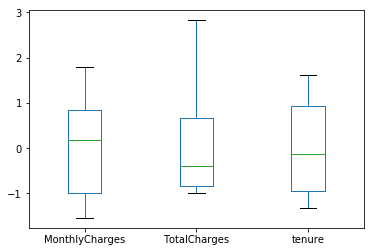

In [35]:
print("scaled continious variables")
df[scale_columns].plot.box(figsize=(length*2,4))

In [36]:
# function to check near zero variance

scale_columns_final_nz = []
scale_columns_variance_final = []

for column in scale_columns:
    scale_columns_variance = df[column].var(axis=None, skipna=None, level=None, ddof=1, numeric_only=None)
    #if  feature_columns_variance > 0.00:
    scale_columns_final_nz.append(column)
    scale_columns_variance_final.append(scale_columns_variance)

In [37]:
df_scale_columns_final = pd.DataFrame({'feature_name':scale_columns_final_nz})
df_variance = pd.DataFrame({'variance':scale_columns_variance_final})
frames = [df_scale_columns_final,df_variance]

print(pd.concat(frames,axis=1))

     feature_name  variance
0  MonthlyCharges  1.000178
1    TotalCharges  1.000178
2          tenure  1.000178


In [38]:
# function to check near zero variance

scale_columns_final_nz = []
scale_columns_variance_final = []

for column in scale_columns:
    scale_columns_variance = df[column].var(axis=None, skipna=None, level=None, ddof=1, numeric_only=None)
    if  scale_columns_variance > 0.01:
        scale_columns_final_nz.append(column)
        scale_columns_variance_final.append(scale_columns_variance)
print("numeric variables with variance above 0.01")
print(scale_columns_final_nz)
print("number of numeric columns: "+ str(len(scale_columns_final_nz)))

numeric variables with variance above 0.01
['MonthlyCharges', 'TotalCharges', 'tenure']
number of numeric columns: 3


In [39]:
# saving numeric columns for scoring
import pickle

scale_columns_final_nz_index = scale_columns_final_nz
pickle_out_num = open("scale_columns_final_nz.pickle","wb")
pickle.dump(scale_columns_final_nz_index, pickle_out_num)
pickle_out_num.close()

In [40]:
# load numeric columns for scoring
import pickle

pickle_in_num = open("scale_columns_final_nz.pickle","rb")
scale_columns_final_nz_index = pickle.load(pickle_in_num)
len(scale_columns_final_nz_index)

3

In [41]:
# create features for modeling objective

target_column = ['target']
feature_columns = scale_columns_final_nz + object_columns_final_nz
print("target_column: " + str(target_column))
print("feature_columns: " + str(feature_columns))
print("dataframe shape: " + str(df[feature_columns].shape))
fig_length = df[feature_columns].shape[1]

target_column: ['target']
feature_columns: ['MonthlyCharges', 'TotalCharges', 'tenure', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
dataframe shape: (5634, 17)


In [42]:
from sklearn.model_selection import train_test_split

training_features, test_features,\
training_target, test_target, = train_test_split(df[feature_columns].values, df[target_column].values.ravel(), test_size = .1, random_state=12)
training_features.shape, test_features.shape, training_target.shape, test_target.shape

((5070, 17), (564, 17), (5070,), (564,))

In [43]:
from imblearn.over_sampling import SMOTE

X_train, X_val, y_train, y_val \
= train_test_split(training_features, training_target, test_size = .1, random_state=12)

# Using smote to increase the number of under-represented class
sm = SMOTE(random_state = 12, ratio = 'minority')

X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
X_train_res.shape, y_train_res.shape, X_val.shape, y_val.shape

((6718, 17), (6718,), (507, 17), (507,))

In [44]:
# import metrics for model evaluation

from sklearn.metrics import recall_score,accuracy_score,confusion_matrix,classification_report,precision_score
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
# create function to evaluate model performance

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    cohen_kappa = cohen_kappa_score(y_test, y_pred, sample_weight=None)
    recall = recall_score(y_test,y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    report = classification_report(y_test, y_pred)
    print("accuracy :" +str(accuracy))
    print("cohen_kappa :" +str(cohen_kappa))
    print("recall :" +str(recall))
    print(" tn, fp, fn, tp :" )
    print(tn, fp, fn, tp)
    print("matrix :")
    print(matrix)
    print("report :")
    print(report)
    return accuracy

/home/mohnkhan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [45]:
from keras.models import Sequential
from keras.layers import Dense,Dropout, Activation

# fix the input dimenstion to number of feature terms
input_dimenation = int(training_features.shape[1])

# create the output dimenstion
output = 1

# create the batch size
batch = int(round(df.shape[0]/10,0))

# epoch
epoch = 100



# Function to create model, required for KerasClassifier
def baseline_model():
# create model
    model = Sequential()
    model.add(Dense(input_dimenation, input_dim=input_dimenation, activation='relu'))
    model.add(Dense(output, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


/home/mohnkhan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/mohnkhan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/mohnkhan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/mohnkhan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty ar

('XGB', 0.850883986232347, 0.08055831948658095)
('GBM', 0.8514792243275849, 0.07982093608186776)
('RF', 0.8599607018664395, 0.06947290836941447)
('DT', 0.792224425164999, 0.05775792638366395)
('ADA', 0.8083033940103611, 0.05930941955176909)
('LM', 0.7503836668795685, 0.03173074350049666)


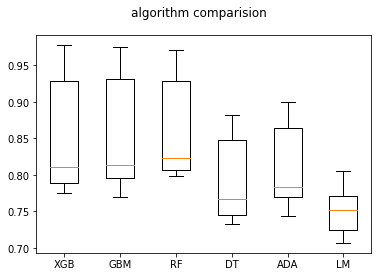

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn import model_selection
import matplotlib.pyplot as plt

# generate list of models  
models = []
models.append(('XGB', XGBClassifier(n_estimators = 500,learning_rate=.1, random_state=21)))
models.append(('GBM', GradientBoostingClassifier(n_estimators = 500,learning_rate=.1, random_state=21)))
models.append(('RF', RandomForestClassifier(n_estimators = 500 ,random_state=21)))
models.append(('DT', DecisionTreeClassifier(splitter='random', random_state=21)))
models.append(('ADA', AdaBoostClassifier(n_estimators = 500,learning_rate=.1, random_state=21)))
models.append(('LM', LogisticRegression(multi_class = 'ovr', solver='saga', random_state=21)))
#models.append(('TF', KerasClassifier(build_fn=baseline_model, epochs=epoch, batch_size=batch, verbose=0))) 

# check model performance
results = []
names = []
seed = 7
msgall = []
scoring='accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state=seed)
    cv_results = cross_val_score(model, X_train_res, y_train_res, cv=kfold, scoring = scoring)
    #cv_results = cross_val_score(model, training_features, training_target, cv=kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = (name, cv_results.mean(), cv_results.std())
    print (msg)
    msgall.append(msg)

# compare algorithms
fig = plt.figure()
fig.suptitle("algorithm comparision")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [47]:
# import ensemble models

from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV

In [48]:
# create grid for randomizedsearch
GBM = GradientBoostingClassifier()

# Number of iterations needed
n_estimators = [int(x) for x in np.linspace(200, 2000, num = 10)]
learning_rate = [0.1, 0.05, 0.02, 0.01]
max_features = ['sqrt','auto','log2','None','1','0.1']
loss = ['deviance', 'exponential']
max_depth = [4, 6, 8]
criterion = ['friedman_mse']
min_samples_split = [2, 5, 10]
min_samples_leaf = [20,50,100,150]
random_state = [21]

# Create the random grid

random_grid_gbm = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'loss':loss,
               'max_depth': max_depth,
               'criterion': criterion,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'random_state': random_state}
pprint(random_grid_gbm)

{'criterion': ['friedman_mse'],
 'learning_rate': [0.1, 0.05, 0.02, 0.01],
 'loss': ['deviance', 'exponential'],
 'max_depth': [4, 6, 8],
 'min_samples_leaf': [20, 50, 100, 150],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'random_state': [21]}


In [49]:
GBM = GradientBoostingClassifier()
# Random search of parameters, using 10 fold cross validation,
# search across 50 different combinations, and use all available cores
gbm_smote = RandomizedSearchCV(estimator = GBM, param_distributions = random_grid_gbm, n_iter = 5, cv = 3, verbose=1, random_state=42, n_jobs = -1)
#gbm = RandomizedSearchCV(estimator = GBM, param_distributions = random_grid_gbm, n_iter = 5, cv = 10, verbose=1, random_state=42, n_jobs = -1)

In [50]:
# Fit the gbm SMOTE model
gbm_smote.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:   10.0s remaining:    8.8s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   17.2s finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
          fit_params=None, iid=True, n_iter=5, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'learning_rate': [0.1, 0.05, 0.02, 0.01], 'loss': ['deviance', 'exponential'], 'max_depth': [4, 6, 8], 'criterion': ['friedman_mse'], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [20, 50, 100, 150], 'random_state': [21]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
     

In [51]:
# Check accuracy on test set

gbm_smote_accuracy = evaluate(gbm_smote,test_features,test_target)

accuracy :0.7836879432624113
cohen_kappa :0.478213391976947
recall :0.6709677419354839
 tn, fp, fn, tp :
338 71 51 104
matrix :
[[338  71]
 [ 51 104]]
report :
             precision    recall  f1-score   support

          0       0.87      0.83      0.85       409
          1       0.59      0.67      0.63       155

avg / total       0.79      0.78      0.79       564



In [52]:
# Fit the gbm model without SMOTE

#gbm.fit(training_features, training_target)

In [53]:
# Check accuracy on test set

#gbm_accuracy = evaluate(gbm,test_features,test_target)

gbm with SMOTE feature importance


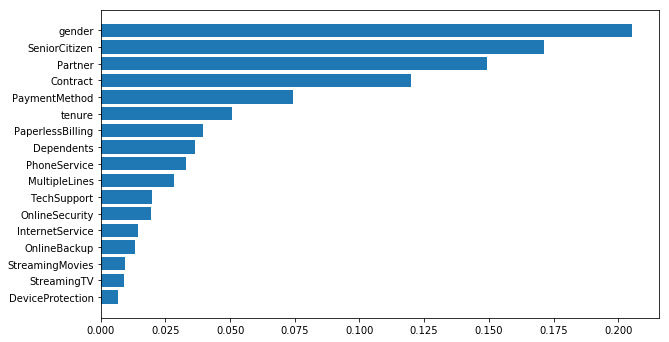

In [54]:
# feature importance plots

print("gbm with SMOTE feature importance")
feature_names=df.drop(['target'],axis=1).columns
feature_importance = gbm_smote.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(10,fig_length/3))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names[sorted_idx])
feature_names[sorted_idx]
plt.show()

#print("gbm without SMOTE feature importance")
#feature_importance = gbm.best_estimator_.feature_importances_
#sorted_idx = np.argsort(feature_importance)
#pos = np.arange(sorted_idx.shape[0]) + .5
#plt.barh(pos, feature_importance[sorted_idx], align='center')
#plt.yticks(pos, feature_names[sorted_idx])
#feature_names[sorted_idx]
#plt.show()

In [55]:
# First create the base model to tune

rf = RandomForestClassifier()

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
random_state = [21]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'random_state':random_state}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'random_state': [21]}


In [56]:
# Random search of parameters, using 10 fold cross validation,
# search across 50 different combinations, and use all available cores

rf_smote = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 10, verbose=1, random_state=42, n_jobs = -1)
#rf = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 10, verbose=0, random_state=42, n_jobs = -1)

In [57]:
# Fit the random search model

rf_smote.fit(X_train_res, y_train_res)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   46.7s finished


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=5, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'random_state': [21]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=1)

In [58]:
# Check accuracy on test set

rf_smote_accuracy = evaluate(rf_smote,test_features,test_target)

accuracy :0.7819148936170213
cohen_kappa :0.4625491958226161
recall :0.632258064516129
 tn, fp, fn, tp :
343 66 57 98
matrix :
[[343  66]
 [ 57  98]]
report :
             precision    recall  f1-score   support

          0       0.86      0.84      0.85       409
          1       0.60      0.63      0.61       155

avg / total       0.79      0.78      0.78       564



In [59]:
# Fit the random search model

#rf.fit(training_features, training_target)

In [60]:
# Check accuracy on test set

#rf_accuracy = evaluate(rf,test_features,test_target)

rf with SMOTE feature importance


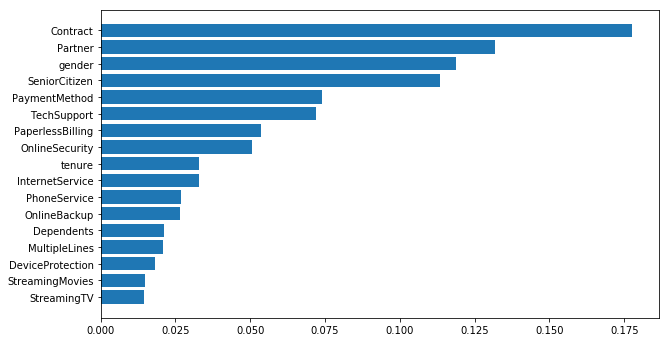

In [61]:
# feature importance plots

print("rf with SMOTE feature importance")
feature_names=df.drop(['target'],axis=1).columns
feature_importance = rf_smote.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(10,fig_length/3))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names[sorted_idx])
feature_names[sorted_idx]
plt.show()

#print("rf without SMOTE feature importance")
#feature_importance = rf.best_estimator_.feature_importances_
#sorted_idx = np.argsort(feature_importance)
#pos = np.arange(sorted_idx.shape[0]) + .5
#plt.barh(pos, feature_importance[sorted_idx], align='center')
#plt.yticks(pos, feature_names[sorted_idx])
#feature_names[sorted_idx]
#plt.show()

In [62]:
# First create the base model to tune

ADA = AdaBoostClassifier()

# Number of iterations needed
n_estimators = [int(x) for x in np.linspace(200, 2000, num = 10)]
learning_rate = [0.1, 0.05, 0.02, 0.01]
algorithm  = ['SAMME', 'SAMME.R']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
random_state = [21]

# Create the random grid
random_grid_ada = {'n_estimators': n_estimators,
                   'learning_rate': learning_rate,
                   'algorithm':algorithm,
 #                 'max_depth': max_depth,
 #                 'min_samples_leaf': min_samples_leaf,
                   'random_state': random_state}
pprint(random_grid_ada)

{'algorithm': ['SAMME', 'SAMME.R'],
 'learning_rate': [0.1, 0.05, 0.02, 0.01],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'random_state': [21]}


In [63]:
# First create the base model to tune
ada = AdaBoostClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
ada_smote = RandomizedSearchCV(estimator = ada, param_distributions = random_grid_ada, n_iter = 5, cv = 10, verbose=1, random_state=42, n_jobs = -1)
#ada = RandomizedSearchCV(estimator = ada, param_distributions = random_grid_ada, n_iter = 5, cv = 10, verbose=0, random_state=42, n_jobs = -1)


In [64]:
# Fit the random search model

ada_smote.fit(X_train_res, y_train_res)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   21.6s finished


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
          fit_params=None, iid=True, n_iter=5, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'learning_rate': [0.1, 0.05, 0.02, 0.01], 'algorithm': ['SAMME', 'SAMME.R'], 'random_state': [21]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=1)

In [65]:
# Check accuracy on test set

ada_smote_accuracy = evaluate(ada_smote,test_features,test_target)

accuracy :0.7358156028368794
cohen_kappa :0.43940121677873833
recall :0.8129032258064516
 tn, fp, fn, tp :
289 120 29 126
matrix :
[[289 120]
 [ 29 126]]
report :
             precision    recall  f1-score   support

          0       0.91      0.71      0.80       409
          1       0.51      0.81      0.63       155

avg / total       0.80      0.74      0.75       564



In [66]:
# Fit the random search model

#ada.fit(training_features, training_target)

In [67]:
# Check accuracy on test set

#ada_accuracy = evaluate(ada,test_features,test_target)

ada with SMOTE feature importance


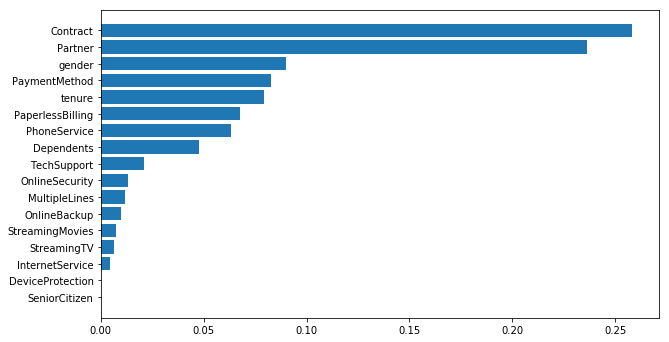

In [68]:
# feature importance plots

print("ada with SMOTE feature importance")
feature_names=df.drop(['target'],axis=1).columns
feature_importance = ada_smote.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(10,fig_length/3))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names[sorted_idx])
feature_names[sorted_idx]
plt.show()

#print("ada without SMOTE feature importance")
#feature_importance = ada.best_estimator_.feature_importances_
#sorted_idx = np.argsort(feature_importance)
#pos = np.arange(sorted_idx.shape[0]) + .5
#plt.barh(pos, feature_importance[sorted_idx], align='center')
#plt.yticks(pos, feature_names[sorted_idx])
#feature_names[sorted_idx]
#plt.show()

In [69]:
# Baseline Model on the Sonar Dataset
import numpy as np
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

seed=7
np.random.seed(seed)

In [70]:
# fix the input dimenstion to number of feature terms
input_dimenation = X_train_res.shape[1]

In [71]:
# INPUT: model parameters
epochs_input = 100
batch_size_input = 50

In [72]:
def create_model():
# create model
    model = Sequential()
    model.add(Dense(input_dimenation, input_dim=input_dimenation, kernel_initializer='normal', activation='relu'))#, kernel_constraint=maxnorm(3)))
    #model.add(Dropout(0.2))
    model.add(Dense(input_dimenation, kernel_initializer='normal', activation='relu'))#, kernel_constraint=maxnorm(2)))
    #model.add(Dropout(0.2))
    model.add(Dense(output, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    sgd = SGD(lr=0.1, momentum=0.9, decay=0.0, nesterov=False)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [73]:
# create model

model_smote = KerasClassifier(build_fn = create_model, epochs = epochs_input, batch_size = batch_size_input, verbose = 1)
# Fit the model
model_smote.fit(X_train_res, y_train_res)


Epoch 1/100
6718/6718 [==============================] - 2s 239us/step - loss: 0.5790 - acc: 0.6703
Epoch 2/100
6718/6718 [==============================] - 1s 76us/step - loss: 0.4902 - acc: 0.7629
Epoch 3/100
6718/6718 [==============================] - 0s 68us/step - loss: 0.4814 - acc: 0.7638
Epoch 4/100
6718/6718 [==============================] - 0s 72us/step - loss: 0.4784 - acc: 0.7718
Epoch 5/100
6718/6718 [==============================] - 1s 77us/step - loss: 0.4738 - acc: 0.7721
Epoch 6/100
6718/6718 [==============================] - 0s 71us/step - loss: 0.4758 - acc: 0.7742
Epoch 7/100
6718/6718 [==============================] - 0s 67us/step - loss: 0.4713 - acc: 0.7749
Epoch 8/100
6718/6718 [==============================] - 1s 77us/step - loss: 0.4688 - acc: 0.7773
Epoch 9/100
6718/6718 [==============================] - 0s 74us/step - loss: 0.4656 - acc: 0.7787
Epoch 10/100
6718/6718 [==============================] - 0s 71us/step - loss: 0.4677 - acc: 0.7769
Epoch 11

6718/6718 [==============================] - 1s 76us/step - loss: 0.4055 - acc: 0.8139
Epoch 84/100
6718/6718 [==============================] - 0s 74us/step - loss: 0.4035 - acc: 0.8110
Epoch 85/100
6718/6718 [==============================] - 0s 69us/step - loss: 0.4025 - acc: 0.8133
Epoch 86/100
6718/6718 [==============================] - 0s 74us/step - loss: 0.4010 - acc: 0.8098
Epoch 87/100
6718/6718 [==============================] - 0s 74us/step - loss: 0.3994 - acc: 0.8120
Epoch 88/100
6718/6718 [==============================] - 0s 73us/step - loss: 0.4022 - acc: 0.8169
Epoch 89/100
6718/6718 [==============================] - 0s 69us/step - loss: 0.3951 - acc: 0.8194
Epoch 90/100
6718/6718 [==============================] - 0s 74us/step - loss: 0.4026 - acc: 0.8118
Epoch 91/100
6718/6718 [==============================] - 1s 79us/step - loss: 0.3917 - acc: 0.8196
Epoch 92/100
6718/6718 [==============================] - 0s 72us/step - loss: 0.3906 - acc: 0.8191
Epoch 93/100


In [74]:
# Check accuracy on test set

tf_accuracy = evaluate(model_smote,test_features,test_target)

564/564 [==============================] - 0s 47us/step
accuracy :0.7127659574468085
cohen_kappa :0.3915209312857123
recall :0.7741935483870968
 tn, fp, fn, tp :
282 127 35 120
matrix :
[[282 127]
 [ 35 120]]
report :
             precision    recall  f1-score   support

          0       0.89      0.69      0.78       409
          1       0.49      0.77      0.60       155

avg / total       0.78      0.71      0.73       564



In [75]:
# create model

#model = KerasClassifier(build_fn = create_model, epochs = epochs_input, batch_size = batch_size_input, verbose = 1)
# Fit the model
#model.fit(training_features, training_target)


In [76]:
# Check accuracy on test set

#tf_accuracy = evaluate(model,test_features,test_target)

In [77]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
import scipy.stats as st
from sklearn.grid_search import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(200, 2000, num = 10)]
learning_rate = [0.1, 0.05, 0.02, 0.01]
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)
random_state = [21]

# Create the random grid

# First create the base model to tune
n_estimators = [int(x) for x in np.linspace(3, 40, num = 10)]
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)
random_state=[21]
params = {  
    'n_estimators': n_estimators,
    'learning_rate': learning_rate,
    "max_depth": max_depth,
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
    'random_state':random_state
}

xgbclass = XGBClassifier(nthreads=-1)  

/home/mohnkhan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/mohnkhan/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [78]:
gs_smote = RandomizedSearchCV(xgbclass, params, n_jobs=1)  
gs_smote.fit(X_train_res, y_train_res)  

/home/mohnkhan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/mohnkhan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/mohnkhan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/mohnkhan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty ar

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, nthreads=-1, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [3, 7, 11, 15, 19, 23, 27, 31, 35, 40], 'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6a70100908>, 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6a701007f...ight': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6a701009b0>, 'random_state': [21]},
          pre_dispatch='2*n_jobs', random_state=None, refi

In [79]:
# Check accuracy on test set

xgb_smote_accuracy = evaluate(gs_smote,test_features,test_target)

accuracy :0.7588652482269503
cohen_kappa :0.45994508202492435
recall :0.7548387096774194
 tn, fp, fn, tp :
311 98 38 117
matrix :
[[311  98]
 [ 38 117]]
report :
             precision    recall  f1-score   support

          0       0.89      0.76      0.82       409
          1       0.54      0.75      0.63       155

avg / total       0.80      0.76      0.77       564



/home/mohnkhan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


XGBOOST without SMOTE feature importance


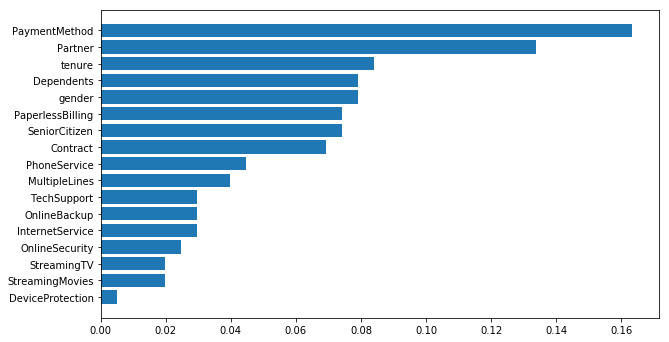

In [80]:
# feature importance plots

#print("XGBOOST with SMOTE feature importance")
feature_names=df.drop(['target'],axis=1).columns
#feature_importance = gs.best_estimator_.feature_importances_
#sorted_idx = np.argsort(feature_importance)
#pos = np.arange(sorted_idx.shape[0]) + .5
#plt.barh(pos, feature_importance[sorted_idx], align='center')
#plt.yticks(pos, feature_names[sorted_idx])
#feature_names[sorted_idx]
#plt.show()

print("XGBOOST without SMOTE feature importance")
feature_importance = gs_smote.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(10,fig_length/3))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names[sorted_idx])
feature_names[sorted_idx]
plt.show()

In [81]:
#gs = RandomizedSearchCV(xgbclass, params, n_jobs=1)  
#gs.fit(training_features, training_target) 

In [82]:
# Check accuracy on test set

#xgb_accuracy = evaluate(gs,test_features,test_target)

In [83]:
def evaluate_accuracy(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    return accuracy

def evaluate_kappa(model, X_test, y_test):
    y_pred = model.predict(X_test)
    kappa = cohen_kappa_score(y_test, y_pred, sample_weight=None)
    return kappa

def evaluate_recall(model, X_test, y_test):
    y_pred = model.predict(X_test)
    recall = recall_score(y_test,y_pred)
    return recall

def evaluate_precision(model, X_test, y_test):
    y_pred = model.predict(X_test)
    precision = precision_score(y_test,y_pred)
    return precision

def evaluate_con_mat_row(model, X_test, y_test):
    y_pred = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    return (tn, fp, fn, tp)

In [84]:
xgbm_smote_accuracy = evaluate_accuracy(gs_smote,test_features,test_target)
gbm_smote_accuracy = evaluate_accuracy(gbm_smote,test_features,test_target)
rf_smote_accuracy = evaluate_accuracy(rf_smote,test_features,test_target)
ada_smote_accuracy = evaluate_accuracy(ada_smote,test_features,test_target)
tf_smote_accuracy = evaluate_accuracy(model_smote,test_features,test_target)
#xgbm_accuracy = evaluate_accuracy(gs,test_features,test_target)
#gbm_accuracy = evaluate_accuracy(gbm,test_features,test_target)
#rf_accuracy = evaluate_accuracy(rf,test_features,test_target)
#ada_accuracy = evaluate_accuracy(ada,test_features,test_target)    
#tf_accuracy = evaluate_accuracy(model,test_features,test_target)

xgbm_smote_kappa = evaluate_kappa(gs_smote,test_features,test_target)
gbm_smote_kappa = evaluate_kappa(gbm_smote,test_features,test_target)
rf_smote_kappa = evaluate_kappa(rf_smote,test_features,test_target)
ada_smote_kappa = evaluate_kappa(ada_smote,test_features,test_target)
tf_smote_kappa = evaluate_kappa(model_smote,test_features,test_target)
#xgbm_recall = evaluate_kappa(gs,test_features,test_target)
#gbm_recall = evaluate_kappa(gbm,test_features,test_target)
#rf_recall = evaluate_kappa(rf,test_features,test_target)
#ada_recall = evaluate_kappa(ada,test_features,test_target)
#tf_recall = evaluate_kappa(model,test_features,test_target)  

xgbm_smote_recall = evaluate_recall(gs_smote,test_features,test_target)
gbm_smote_recall = evaluate_recall(gbm_smote,test_features,test_target)
rf_smote_recall = evaluate_recall(rf_smote,test_features,test_target)
ada_smote_recall = evaluate_recall(ada_smote,test_features,test_target)
tf_smote_recall = evaluate_recall(model_smote,test_features,test_target)
#xgbm_recall = evaluate_recall(gs,test_features,test_target)
#gbm_recall = evaluate_recall(gbm,test_features,test_target)
#rf_recall = evaluate_recall(rf,test_features,test_target)
#ada_recall = evaluate_recall(ada,test_features,test_target)
#tf_recall = evaluate_recall(model,test_features,test_target)  

xgbm_smote_precision = evaluate_precision(gs_smote,test_features,test_target)
gbm_smote_precision = evaluate_precision(gbm_smote,test_features,test_target)
rf_smote_precision = evaluate_precision(rf_smote,test_features,test_target)
ada_smote_precision = evaluate_precision(ada_smote,test_features,test_target)
tf_smote_precision = evaluate_precision(model_smote,test_features,test_target)
#xgbm_precision = evaluate_precision(gs,test_features,test_target)
#gbm_precision = evaluate_precision(gbm,test_features,test_target)
#rf_precision = evaluate_precision(rf,test_features,test_target)
#ada_precision = evaluate_precision(ada,test_features,test_target)
#tf_precision = evaluate_precision(model,test_features,test_target) 

xgbm_smote_tfft = evaluate_con_mat_row(gs_smote,test_features,test_target)
gbm_smote_tfft = evaluate_con_mat_row(gbm_smote,test_features,test_target)
rf_smote_tfft = evaluate_con_mat_row(rf_smote,test_features,test_target)
ada_smote_tfft = evaluate_con_mat_row(ada_smote,test_features,test_target)
tf_smote_tfft = evaluate_con_mat_row(model_smote,test_features,test_target)
#xgbm_tfft = evaluate_con_mat_row(gs,test_features,test_target)
#gbm_tfft = evaluate_con_mat_row(gbm,test_features,test_target)
#rf_tfft = evaluate_con_mat_row(rf,test_features,test_target)
#ada_tfft = evaluate_con_mat_row(ada,test_features,test_target)
#tf_tfft = evaluate_con_mat_row(model,test_features,test_target)

/home/mohnkhan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


564/564 [==============================] - 0s 18us/step


/home/mohnkhan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


564/564 [==============================] - 0s 19us/step


/home/mohnkhan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


564/564 [==============================] - 0s 17us/step


/home/mohnkhan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


564/564 [==============================] - 0s 16us/step


/home/mohnkhan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


564/564 [==============================] - 0s 21us/step


In [85]:
report = [{'model': 'XGBM_smote', 'accuracy': xgbm_smote_accuracy, 'kappa': xgbm_smote_kappa,'recall': xgbm_smote_recall, 'precision': xgbm_smote_precision,'tn, fp, fn, tp': xgbm_smote_tfft},
          {'model': 'GBM_smote', 'accuracy': gbm_smote_accuracy, 'kappa': gbm_smote_kappa,'recall': gbm_smote_recall, 'precision': gbm_smote_precision,'tn, fp, fn, tp': gbm_smote_tfft},
          {'model': 'RF_smote',  'accuracy': rf_smote_accuracy, 'kappa': rf_smote_kappa,'recall': rf_smote_recall, 'precision': rf_smote_precision,'tn, fp, fn, tp': rf_smote_tfft},
          {'model': 'ADA_smote', 'accuracy': ada_smote_accuracy, 'kappa': ada_smote_kappa, 'recall': ada_smote_recall, 'precision': ada_smote_precision ,'tn, fp, fn, tp': ada_smote_tfft },
          {'model': 'tf_smote', 'accuracy': tf_smote_accuracy,  'kappa': tf_smote_kappa,'recall': tf_smote_recall, 'precision': tf_smote_precision ,'tn, fp, fn, tp': tf_smote_tfft }]#,
          #{'model': 'XGBM', 'accuracy': xgbm_accuracy, 'recall': xgbm_recall, 'precision': xgbm_precision,'tn, fp, fn, tp': xgbm_tfft},
          #{'model': 'GBM', 'accuracy': gbm_accuracy, 'recall': gbm_recall, 'precision': gbm_precision, 'tn, fp, fn, tp': gbm_tfft},
          #{'model': 'RF',  'accuracy': rf_accuracy, 'recall': rf_recall, 'precision': rf_precision, 'tn, fp, fn, tp': rf_tfft},
          #{'model': 'ADA', 'accuracy': ada_accuracy,  'recall': ada_recall, 'precision': ada_precision,  'tn, fp, fn, tp': ada_tfft },
          #{'model': 'tf', 'accuracy': tf_accuracy,  'recall': tf_recall, 'precision': tf_precision ,'tn, fp, fn, tp': tf_smote_tfft }]
df1 = pd.DataFrame(report)
df1 = df1[['model', 'accuracy', 'kappa', 'recall', 'precision','tn, fp, fn, tp']]

In [86]:
df1

,model,accuracy,kappa,recall,precision,"tn, fp, fn, tp"
0,XGBM_smote,0.758865,0.459945,0.754839,0.544186,"(311, 98, 38, 117)"
1,GBM_smote,0.783688,0.478213,0.670968,0.594286,"(338, 71, 51, 104)"
2,RF_smote,0.781915,0.462549,0.632258,0.597561,"(343, 66, 57, 98)"
3,ADA_smote,0.735816,0.439401,0.812903,0.512195,"(289, 120, 29, 126)"
4,tf_smote,0.712766,0.391521,0.774194,0.485830,"(282, 127, 35, 120)"


In [87]:
df1 = df1.set_index('model')

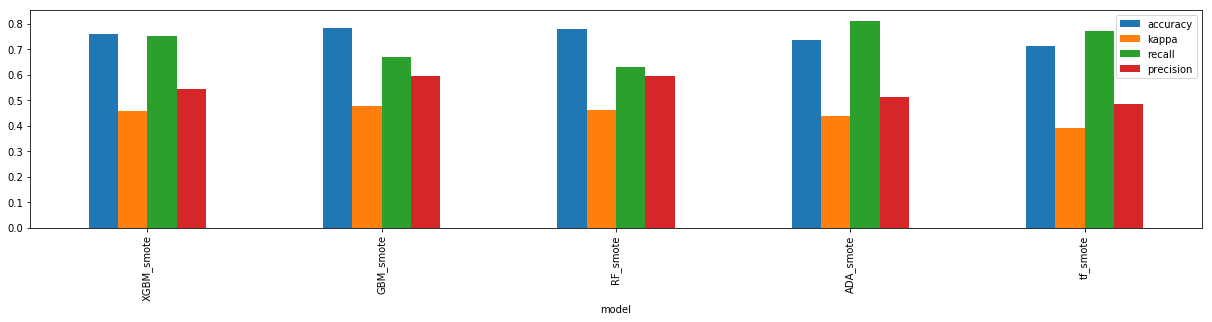

In [88]:
df1.plot.bar(figsize=(df_length, 4))

In [89]:
# import pickle
import pickle

# save GBM model to disk
filename1 = 'finalized_gbm_smote.sav'
pickle.dump(gbm_smote, open(filename1, 'wb'))

# save RF model to disk
filename2 = 'finalized_rf_smote.sav'
pickle.dump(rf_smote, open(filename2, 'wb'))

# save Adaboost model to disk
filename3 = 'finalized_ada_smote.sav'
pickle.dump(ada_smote, open(filename3, 'wb'))

# save GBM model to disk
#filename4 = 'finalized_gbm.sav'
#pickle.dump(gbm, open(filename4, 'wb'))

# save RF model to disk
#filename5 = 'finalized_rf.sav'
#pickle.dump(rf, open(filename5, 'wb'))

# save Adaboost model to disk
#filename6 = 'finalized_ada.sav'
#pickle.dump(ada, open(filename6, 'wb'))

################XGBoost model save
# save XGB_smote model to disk
filename1x_smote = 'finalized_xgb_smote.sav'
pickle.dump(gs_smote, open(filename1x_smote, 'wb'))

# save XGB model to disk
#filename1x = 'finalized_xgb.sav'
#pickle.dump(gs, open(filename1x, 'wb'))

In [90]:
# serialize model to JSON
model_smote_json = model_smote.model.to_json()
with open("model_smote_json.json", "w") as json_file:
    json_file.write(model_smote_json)
# serialize weights to HDF5
model_smote.model.save_weights("model_smote_json.h5")
print("Saved model to disk")

Saved model to disk


In [91]:
# serialize model to JSON
#model_json = model.model.to_json()
#with open("model_json.json", "w") as json_file:
#    json_file.write(model_json)
# serialize weights to HDF5
#model.model.save_weights("model_json.h5")
#print("Saved model to disk")